# **Data Cleaning: An Essential Part of Data Analysis**

Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset. Messy data leads to unreliable outcomes, and cleaning data is an essential part of data analysis. Demonstrating your data cleaning skills is key to landing a job. In this notebook, we will walk through the process of cleaning a dataset, focusing on the following key concepts and challenges:

## **Key Concepts and Challenges**
1. **Data Integrity**: Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.  
2. **Missing Data Handling**: Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset.  
3. **Duplicate Removal**: Identifying and eliminating duplicate records to maintain data uniqueness.  
4. **Standardization**: Consistent formatting and units across the dataset for accurate analysis.  
5. **Outlier Detection**: Identifying and addressing outliers that may skew analysis or model performance.


## **Loading and Previewing the Data**

We begin by loading the dataset and inspecting the first few rows to get a sense of the data structure.



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/AB_NYC_2019.csv'
df=pd.read_csv(file_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## **Data Integrity**

The next step is to ensure that the dataset is consistent and contains no obvious anomalies.

### **1. Checking Data Types**
We check the data types of the columns to ensure they are appropriate for their respective data.


In [9]:
#Data Integrity
# Check the data types of the columns
print("\nData Types:")
print(df.dtypes)

# Check for any obvious anomalies like negative values for price or minimum nights
print("\nCheck for anomalies (negative price or minimum nights):")
print(df[(df['price'] < 0) | (df['minimum_nights'] < 0)])

# Check for unique values in categorical columns (e.g., neighbourhood_group, room_type)
print("\nUnique values in categorical columns:")
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())

# Check for any invalid or out-of-bound latitude/longitude values
print("\nCheck for invalid latitude/longitude values:")
print(df[(df['latitude'] < -90) | (df['latitude'] > 90) | (df['longitude'] < -180) | (df['longitude'] > 180)])


Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Check for anomalies (negative price or minimum nights):
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_3

## **Handling Missing Data**

Now, we move on to handling the missing data. There are two strategies: imputation (filling missing values) and deletion.

In [6]:
# Handling missing data:
# 1. For columns with a small number of missing values, we can fill them with the mean (for numeric columns) or the mode (for categorical columns)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)  # Filling missing reviews_per_month with the mean
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)  # Filling missing last_review with the mode


# Check if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12816\3960056489.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)  # Filling missing reviews_per_month with the mean
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12816\3960056489.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [8]:
#Handling Remaining Missing Values
# Fill missing 'name' with 'Unknown'
df['name'].fillna('Unknown', inplace=True)

# Fill missing 'host_name' with 'Unknown Host'
df['host_name'].fillna('Unknown Host', inplace=True)

# Verify that all missing values are handled
print("\nMissing Values After Final Handling:")
print(df.isnull().sum())



Missing Values After Final Handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12816\1442404881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12816\1442404881.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
print('\nDuplicates:')
print(f'Number of duplicate rows: {df.duplicated().sum()}')


Duplicates:
Number of duplicate rows: 0


## **Standardizing Data**

We standardize the column names and ensure that categorical columns are in lowercase for consistency.


In [11]:
# Standardize column names to lowercase with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Ensure categorical text data is in consistent lowercase format
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in categorical_columns:
    df[col] = df[col].str.lower()

# Verify the changes
print("\nStandardized Column Names and Sample Data:")
print(df.head())



Standardized Column Names and Sample Data:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            brooklyn    kensington  40.64749  -73.97237   
1     Jennifer           manhattan       midtown  40.75362  -73.98377   
2    Elisabeth           manhattan        harlem  40.80902  -73.94190   
3  LisaRoxanne            brooklyn  clinton hill  40.68514  -73.95976   
4        Laura           manhattan   east harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     private room  

## **Outlier Detection and Removal**

We now visualize the numerical columns to detect any outliers and take appropriate action.


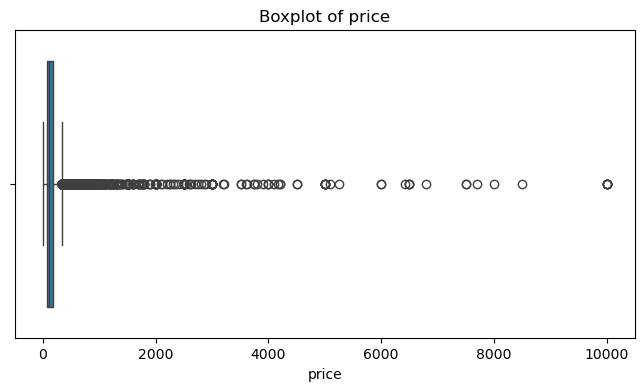

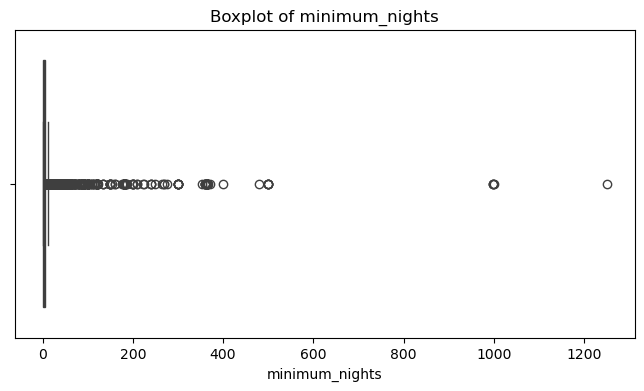

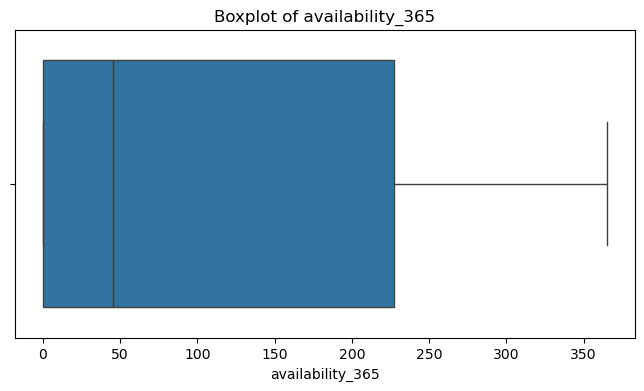


Outliers in price:
     price
61     375
85     800
103    500
114    350
121    400

Outliers in minimum_nights:
    minimum_nights
6               45
14              90
29              14
36              60
45              29

Outliers in availability_365:
Empty DataFrame
Columns: [availability_365]
Index: []


In [16]:
#Boxplot for numerical columns to visualize outliers
numerical_columns = ['price', 'minimum_nights', 'availability_365']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Identify outliers using IQR for each column
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in {col}:")
    print(outliers[col][[col]].head())


In [17]:
#Handle outliers
# Remove rows with extreme price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Extreme price outliers removed.")

# Set a logical upper limit for minimum nights
min_nights_upper_limit = 30  # Assume a realistic max of 1 month

# Cap minimum_nights at the upper limit
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: min(x, min_nights_upper_limit))

print(f"Minimum nights capped at {min_nights_upper_limit}")


Extreme price outliers removed.
Minimum nights capped at 30


## **Final Boxplots**

We create final boxplots for numerical columns to verify that outliers have been successfully removed or handled.

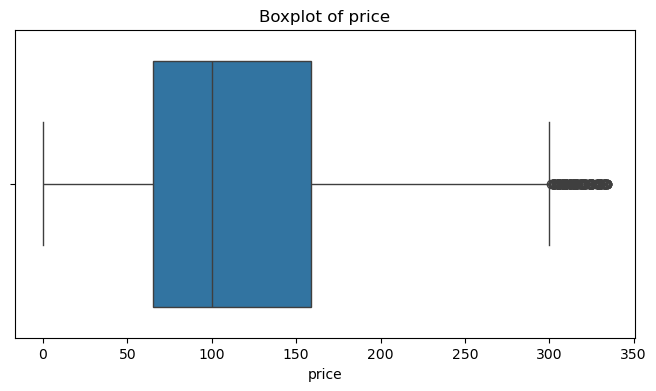

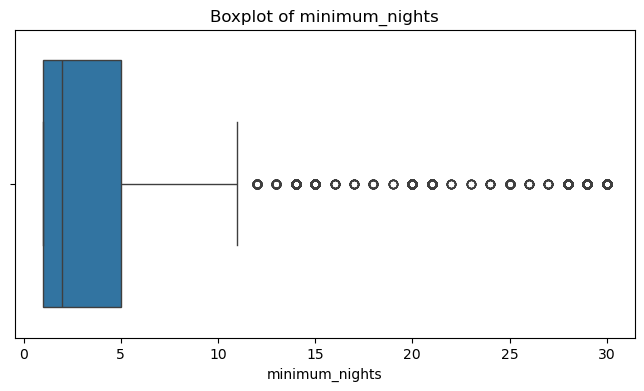

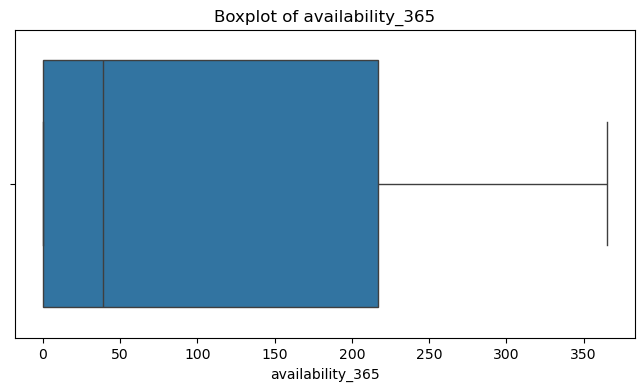

In [18]:
numerical_columns = ['price', 'minimum_nights', 'availability_365']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()